# Project: Writing a Data Scientist Blog Post

## Introduction and Question

- Ford GoBike System Data: This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

- The data including information of 183.412 ford gobike trips in San Francisco area with 16 variables (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). But some data have wrong so it needs to be clean them.

- Question: How location distribution, user type, user age and also gender afftect to the trip?

## Data Cleaning and Accessing

### Data Cleaning

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.simplefilter("ignore")

In [15]:
df_ford = pd.read_csv("201902-fordgobike-tripdata.csv")
df_ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [16]:
df_ford.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [17]:
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133819 entries, 0 to 133818
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             133819 non-null  int64  
 1   start_time               133819 non-null  object 
 2   end_time                 133819 non-null  object 
 3   start_station_id         133643 non-null  float64
 4   start_station_name       133643 non-null  object 
 5   start_station_latitude   133819 non-null  float64
 6   start_station_longitude  133819 non-null  float64
 7   end_station_id           133643 non-null  float64
 8   end_station_name         133643 non-null  object 
 9   end_station_latitude     133819 non-null  float64
 10  end_station_longitude    133819 non-null  float64
 11  bike_id                  133819 non-null  int64  
 12  user_type                133819 non-null  object 
 13  member_birth_year        127811 non-null  float64
 14  memb

### Data Accessing

#### How age of rider distributed?

In [33]:
df_ford['member_age'] = 2019 - df_ford['member_birth_year']

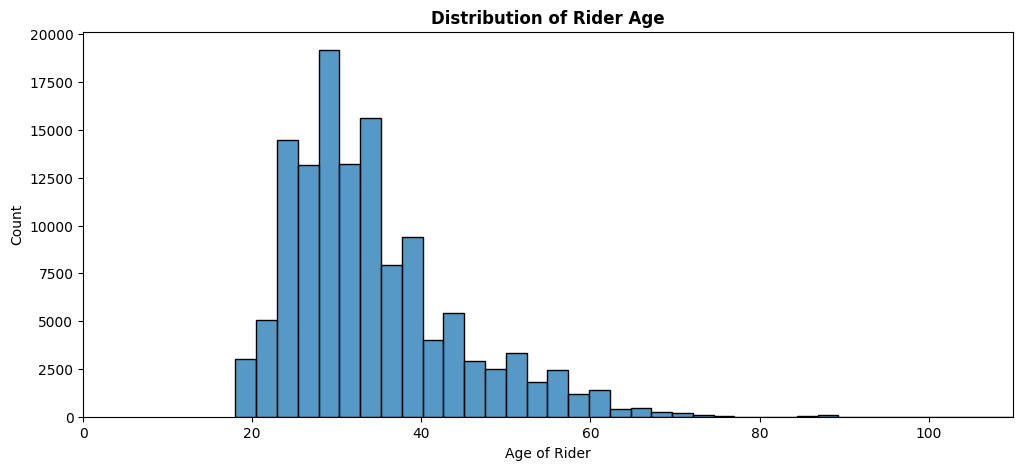

In [35]:
fig, ax = plt.subplots( figsize = (12,5), dpi = 100);
sns.color_palette("hls", 8)
sns.histplot(data=df_ford, x= 2019 - df_ford['member_birth_year'], bins=50);
plt.xlim(0,110);
plt.title("Distribution of Rider Age", fontweight='bold');
plt.xlabel("Age of Rider");
plt.ylabel("Count");

Individuals aged 20 to 45 make up the majority of participants. Furthermore, out of the three gender groupings, the majority of bike riders are men.

#### What are percentage of User Type and Member Gender?

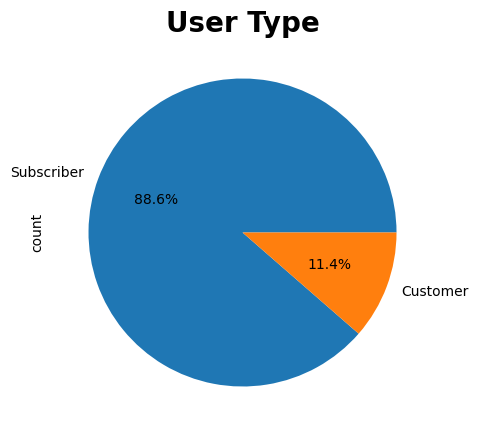

In [20]:
user_type = df_ford['user_type'].value_counts()
ax = user_type.plot(kind='pie', autopct= '%1.1f%%',figsize=(5, 5));
# set the title
ax.set_title("User Type" , fontsize=20, fontweight='bold');

A huge amount of people have signed up for subscriptions.

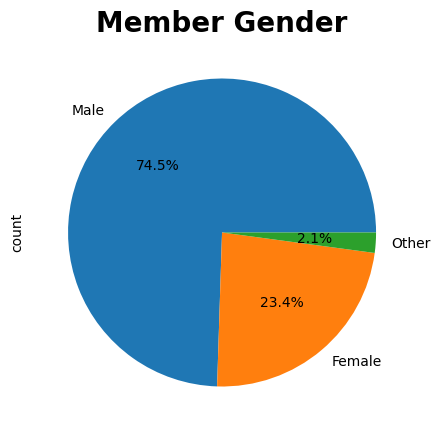

In [21]:
member_gender = df_ford['member_gender'].value_counts()
ax = member_gender.plot(kind='pie', autopct= '%1.1f%%',figsize=(5, 5));
# set the title
ax.set_title("Member Gender" , fontsize=20, fontweight='bold');

There are more Male members than Female members. There are more women than Other.

#### Is there any relationship between duration second and user type?

In [31]:
def barplot(col, title, xlabel, ylabel, rotation):
    """
        This function provide the counts for the each series in the column and plot it in bar plot.
        Input: column, title, xlabel, ylabel, rotation of xticks.
        
        Output: plt bar plot of value counts
    """
    fig, ax = plt.subplots(figsize = (4,4), dpi = 120);
    col.value_counts().plot(kind='bar');
    plt.title(title, fontweight='bold');
    plt.ylabel(xlabel);
    plt.xlabel(ylabel);
    plt.xticks(rotation=0);

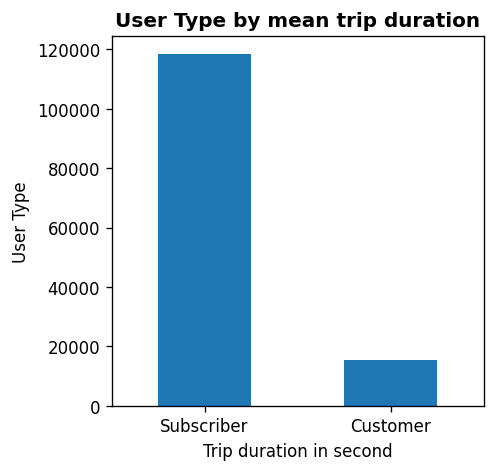

In [32]:
barplot(df_ford['user_type'], "User Type by mean trip duration", "User Type", "Trip duration in second", 0)

Although the number of Subscriber user is more than number of Customer, Customer trip duration is more than Subscriber

#### Is there any relationship between duration second, gender and user type?

In [26]:
x = 'member_gender'
y = 'duration_sec'
orders = ["Male","Female","Other"]

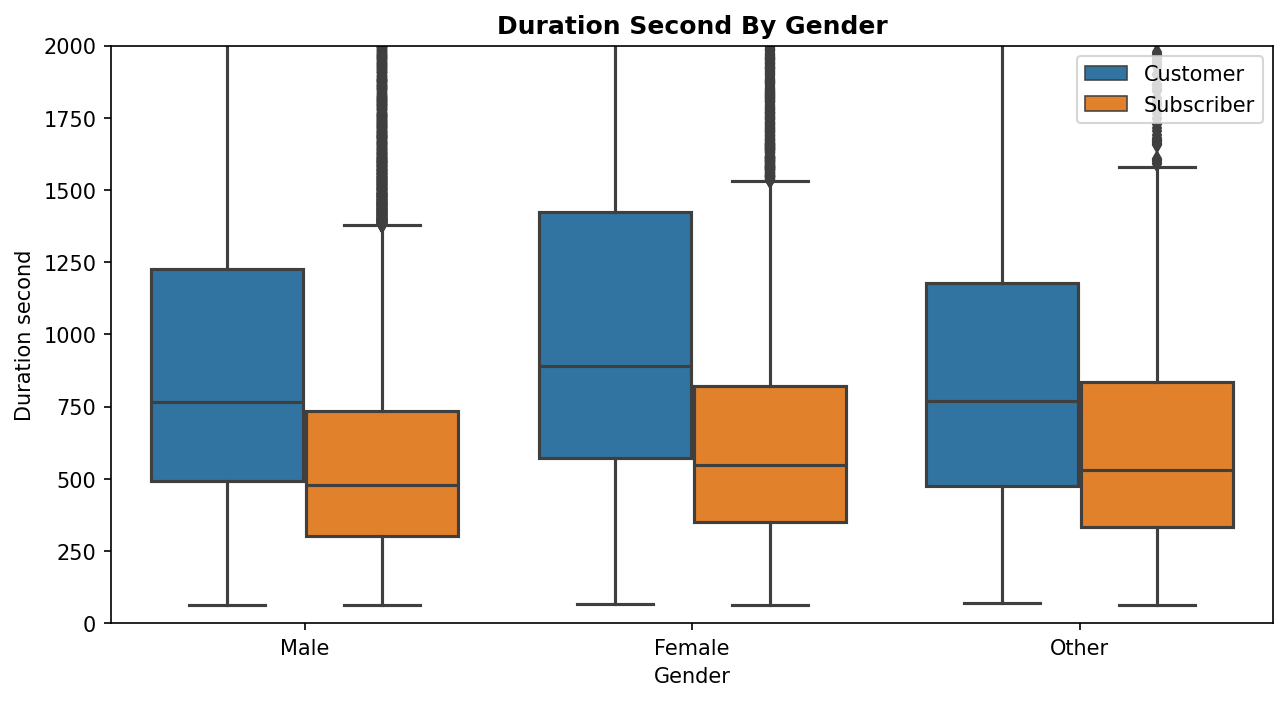

In [30]:
fig, ax = plt.subplots(figsize = (10,5), dpi = 150);
sns.boxplot(data=df_ford, x=x, y=y, order=orders, hue ='user_type');
plt.ylim([0,2000]);
plt.title("Duration Second By Gender", fontweight='bold');
plt.xlabel("Gender");
plt.ylabel("Duration second");
plt.legend(loc=1);

Subscriber have less trip than Customer beside that Male is less than Female also.

#### Is there any relationship between duration second, week day and user type?

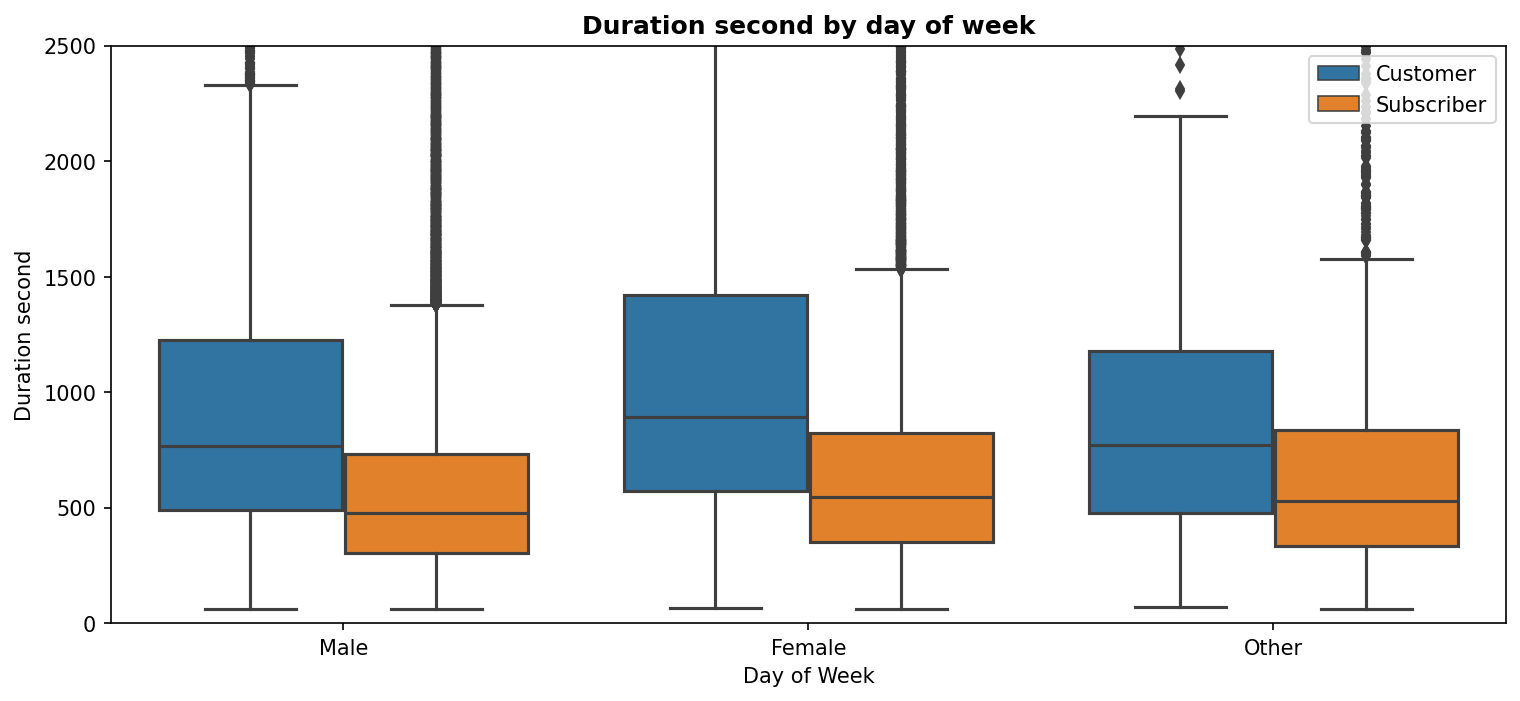

In [29]:
fig, ax = plt.subplots(figsize = (12,5), dpi = 150);
sns.boxplot(data=df_ford, x=x, y=y, order=orders,hue='user_type');
plt.ylim([0,2500]);
plt.title("Duration second by day of week", fontweight='bold');
plt.xlabel("Day of Week");
plt.ylabel("Duration second");
plt.legend(loc=1);

It seems that more trip in weekend than day week for Customer and for Subscriber it the same for all week.

#### What is top 10 Start and End Station have most rider?

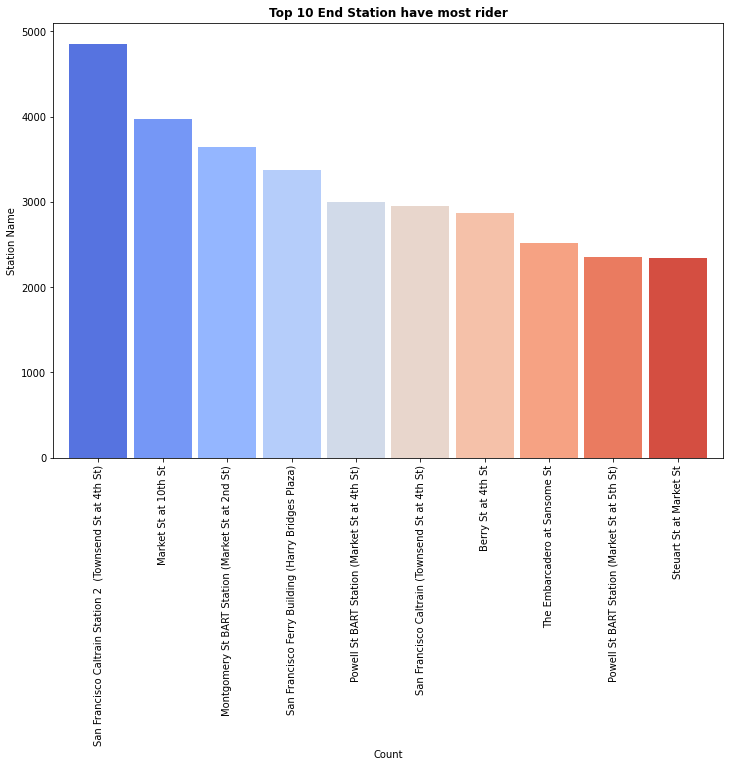

In [18]:
# Separate the genre based on the pipe (|).
df_ford['end_station_name'] = df_ford['end_station_name'].astype(str)
stationList = df_ford['end_station_name'].str.split('|')

# Create list of station
station = []
for i in stationList:
    station.extend(i)
    
# Plot based on the value counts
plt.subplots(figsize=(12,8));
pd.Series(station).value_counts()[:10].sort_values(ascending=False).plot.bar(width=0.9,color=sns.color_palette('coolwarm',10));
plt.title('Top 10 End Station have most rider', fontweight='bold');
plt.xlabel('Count');
plt.ylabel('Station Name');
plt.show();

The previous graphic shows that when riders begin to ride, Market St. near 10th St. has the greatest number of riders. However, this is not the finish station. It's a San Francisco Caltrain Station 2 since there may be a lot of lovely places and well-known restaurants nearby.

## Conclusions

To sum up, there is a significant percentage of subscribers, but riders spend more time riding than any other consumer. We also need to come up with a plan to turn them into customers. In addition, most bikers ride their bicycles on the weekends. That would be fantastic if we organized some game shows and marketing campaigns at that time to draw in more clients.